# randomness

When you're working with coding, especially for a visual output, you may find yourself wanting to produce variations on the same output, whether those variations are small or large. When the computer is given sufficiently detailed instructions on how to behave in different situations, there's no reason that a program can't be dynamic (ever-changing) and extensible (able to be used for many different purposes). One powerful tool to these ends is incorporating *randomness* to alter the output of code in ways that will never be exactly the same twice.

The fact is, computers aren't great at behaving truly randomly. If you ask a computer to come up with a random number, it will inevitably end up doing some (non-random) calculations to give you a result, since all computers run on a series of instructions, no matter how complex. There have been many novel approaches to find a source of randomness in the world that can be fed into a computer - one fantastic solution was [Lavarand](https://en.wikipedia.org/wiki/Lavarand), a wall of lava lamps which were photographed and the results transformed into a series of numbers. This system is currently used by Cloudflare to assist in handling internet traffic.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/Lava_lamp_wall_at_Cloudflare_office_-2.jpg">

*A wall of lava lamps in the entrance area of the Cloudflare offices at 101 Townsend Street in San Francisco. Creative commons, via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Lava_lamp_wall_at_Cloudflare_office_-2.jpg)*

Most programs (especially ones that don't need to rely on randomness for security reasons, like gambling or storing passwords) can get away with *pseudorandomness*. Essentially, a large enough series of numbers (possibly with modifications thrown in based on things like the current computer's time) will appear random to the human eye, and that's good enough. In addition, there are different types of randomness. Ken Perlin, in 1983, designed an algorithm for pseudorandomness that is usually called *Perlin noise*. If you compare true (pseudo)randomness and Perlin randomness in the image below, you can see it is especially suited to randomly generating smooth, somewhat organic sequences.

<img src="images/randomness/random-random-v-noise.png">

This image was generated by picking random numbers with either algorithm (true pseudorandomness, or Perlin randomness) over time, and using it as the next point on a line. There are py5 functions for generating different types of noise (and even plugins which mimic the Perlin noise algorithm), but we'll be concentrating on two functions related to regular randomness: `random()` and `random_seed()`. 

`random()` can be used with a single argument - an upper bound - to get a number below that upper bound. You can also use it with two arguments, to get a number between the two. Let's make a variable, *x*, and assign a random number to it a few times to see how that works.

1.4915710700885647
5.75047428984392
5


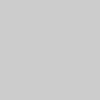

In [1]:
x = random(5)
print(x)
x = random(5,10)
print(x)
print( int(x) )

You'll quickly notice that the first two numbers are long decimal numbers rather than a whole number (a *float*, not an *integer*). If you'd like to instead get a whole number, you can use the `int()` function, seen above, to round it down. You'll also notice that - thanks to it being random - you get different results from repeatedly running the exact same sketch. 

Randomness is very powerful when it's combined with *iteration*, the ability to repeat something over and over. In other tutorials here, we've discussed *for* loops and *while* loops, an easy way to iterate over code as many times as you like. Let's combine randomness with our previous understanding of for loops to draw a hundred random dots on the screen.

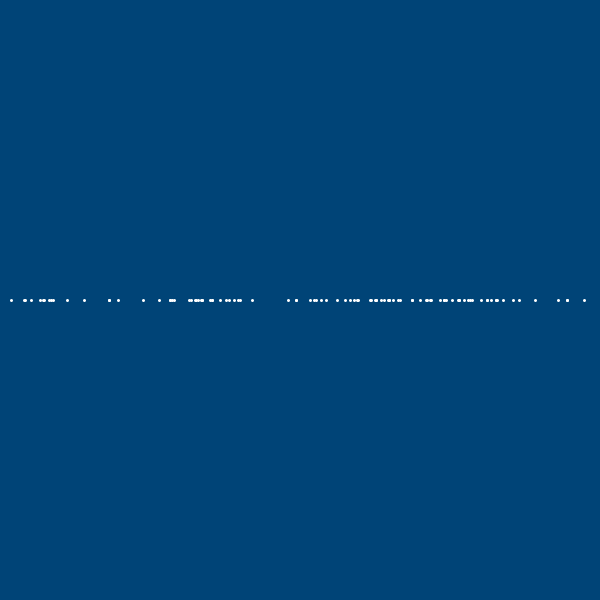

In [2]:
size(600,600)
background('#004477')
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

for i in range(100):
    point( random(width), height/2 )

<img src="images/randomness/random-points-1d.png">

Broken down farther, in this range of 100 (to run the code 100 times), we're placing each point at the center of the screen vertically (`height/2`), and at a random point on the X-axis, between zero and `width`. This means they will never be placed off the right or left side of the screen. 

Let's edit our sketch to place a thousand points instead, and place them anywhere on the screen.

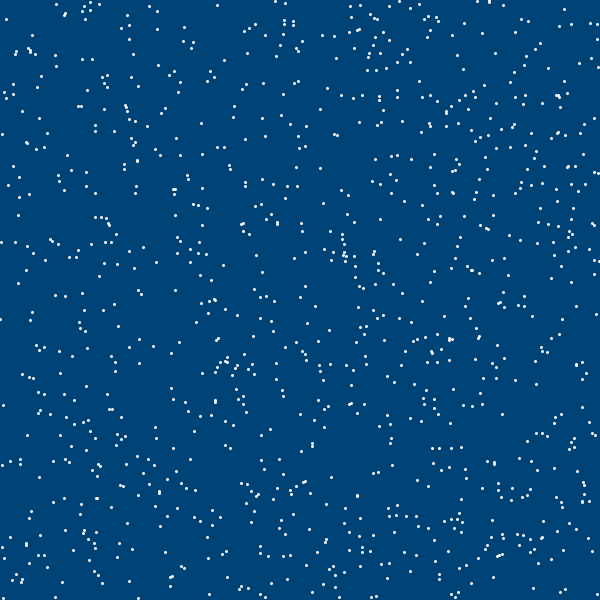

In [3]:
size(600,600)
background('#004477')
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

for i in range(1000):
    point( random(width), random(height) )

If you ran this code a hundred times, each result would look slightly different. However, this isn't always the result you want. If you've played any video game that uses randomized or procedurally generated elements, you may have heard of the concept of a *seed*. Essentially, the *seed* is a value that the game uses in its random calculations. In games that allow you to generate new levels using a seed, you and your friend on another continent can put in the exact same seed and play through the exact same game world, because all of these calculations have used their same starting value. 

In py5, you can use a function, `random_seed()`, to set this value manually. If `random_seed()` stays the same, running the sketch a hundred times will give the exact same results!

In [ ]:
size(600,600)
background('#004477')
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

random_seed(289212)

for i in range(1000):
    point( random(width), random(height) )

Run this sketch a few times. If you aren't certain whether your seed is working, you can concentrate on a single corner to confirm the results. No matter how many times you run it, the placement of the points will be the same. 

Let's have a practical example of combining randomness and iteration to create unique tiled artworks. 

## Truchet tiles

Sébastien Truchet (1657–1729), a French Dominican priest, was active in the fields of mathematics, hydraulics, graphics and typography. One of his many contributions was a scheme for creating interesting patterns using tiles – which have since become known as Truchet tiles. The original Truchet tile is square, with two halves of color, divided diagonally. By rotating this tile, you can create four different variations.

<img src="images/randomness/random-truchet-contrast-set.png">

Combining these tiles in different patterns (whether those patterns are carefully designed or completely random) has a variety of pleasing results:

<img src="images/randomness/random-truchet-variants.png">

We'll be experimenting with a variation on the Truchet tile called the quarter-circle tile. This only has two possible rotations, making it simple to work with. 

<img src="images/randomness/random-truchet-quarter-circle-set.png">

To draw just a single quarter-circle Truchet tile up in the corner of a sketch, you could use the following code...

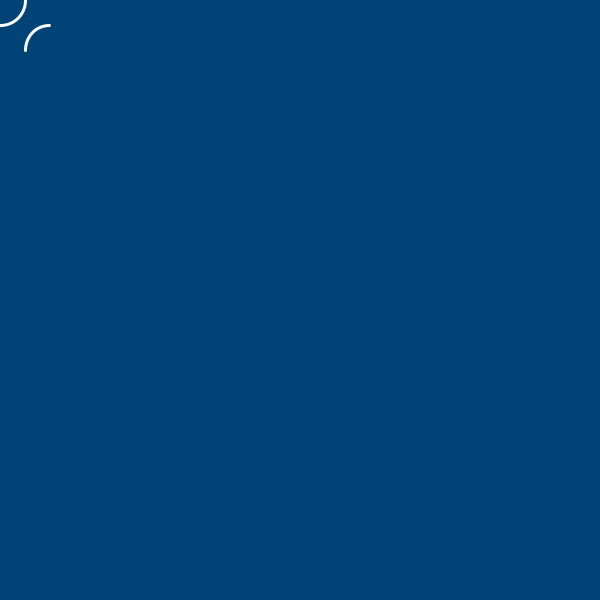

In [4]:
size(600,600)
background('#004477')
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

arc(0,0, 50,50, 0,PI/2)
arc(50,50, 50,50, PI,PI+PI/2)

Just one truchet tile isn't going to cut it. Instead, let's try using a for loop to place Truchet tiles automatically. By nesting one for loop inside another, we can easily handle rows and columns simultaneously, to elegantly fill the screen with these tiles.

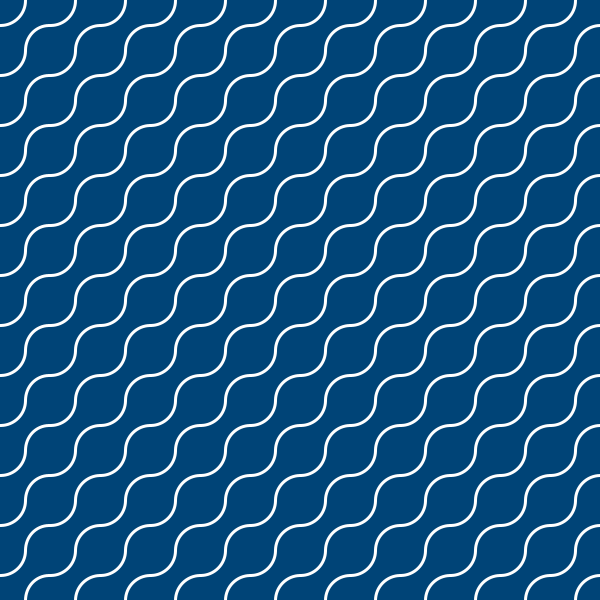

In [5]:
size(600,600)
background('#004477')
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

for column in range(12):
    for row in range(12):
        arc(column * 50, row * 50, 50,50, 0,PI/2)
        arc(column * 50 +50, row * 50+50, 50,50, PI,PI+PI/2)

Great - but they're only being printed with one of our two possible rotations. Because there are only possibilities, we can essentially perform a coin flip each time a tile is placed. This means we can use `random(2)` - as long as we also wrap it in an `int()` function, since of course including the possibility for decimal numbers gives us way more than two options! Test out this coin flip by adding the appropriate `print()` command in your loop. The console will be filled with 1s and 0s, since our upper limit is 2 and our numbers are being rounded down each time.

1
1
0
1
0
1
1
0
0
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
1
0
1
1
0
0
0
0
1
1
1
1
0
0
0
1
0
1
0
0
1
1
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
1
0
1
0
1
1
1
1
1
0
0
1
1
0
1
1
0
0
1
1
1
1
0
0
0
0
1
0
1
1
0
0
1
0
1
1
0
0
1
1
1
1
1
0
1
1
0
1
0
1
1
1
0
1
0
1
1
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1


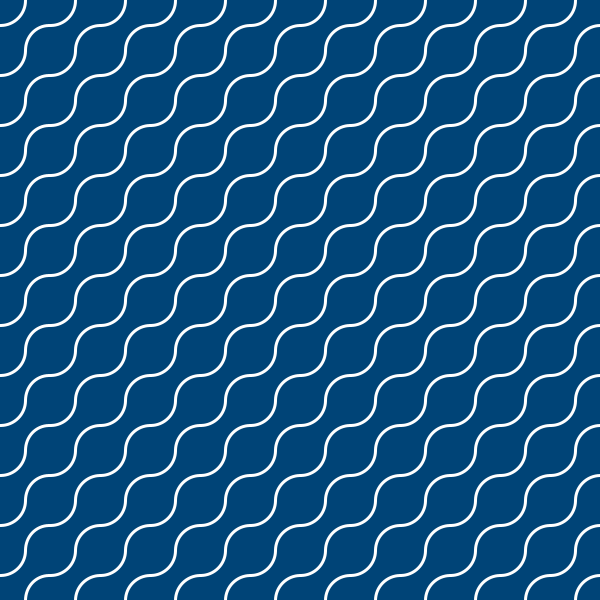

In [6]:
size(600,600)
background('#004477')
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

for column in range(12):
    for row in range(12):
        print( int(random(2)) )
        arc(column * 50, row * 50, 50,50, 0,PI/2)
        arc(column * 50 +50, row * 50+50, 50,50, PI,PI+PI/2)

For the sake of streamlining our code, we can transform this into a True or False result by comparing the output to one of the two possible options. This change will fill the console with True and False output instead - a perfect coin flipper!

False
True
False
False
True
False
False
False
True
False
False
True
False
False
False
True
True
False
True
True
False
True
True
False
True
False
False
True
True
False
False
True
False
True
False
True
True
True
False
True
True
False
True
True
False
True
True
False
False
False
True
False
False
True
False
True
True
True
True
True
True
True
True
False
True
False
True
True
True
True
True
True
False
False
True
True
True
False
True
True
False
False
True
False
True
True
False
True
False
False
True
True
False
True
True
False
False
True
True
False
False
True
False
False
False
False
True
True
True
True
True
True
True
True
False
True
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
False
False
True
True
False
False
False
True
True
False
True
False
True


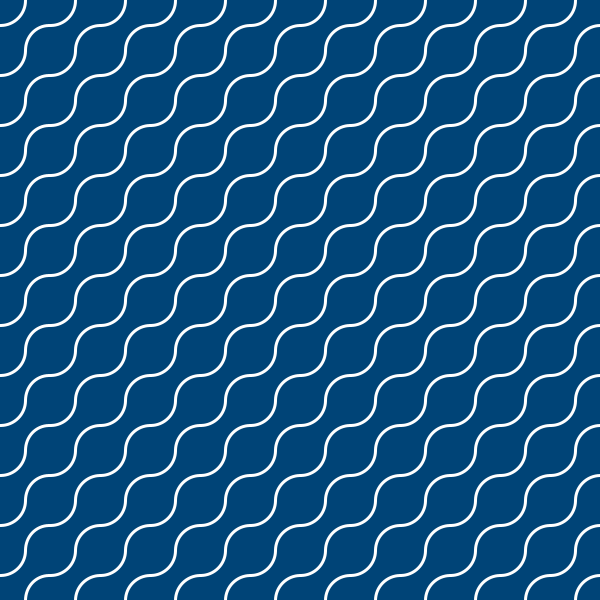

In [7]:
size(600,600)
background('#004477')
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

for column in range(12):
    for row in range(12):
        print( int(random(2)) == 1 )
        arc(column * 50, row * 50, 50,50, 0,PI/2)
        arc(column * 50 +50, row * 50+50, 50,50, PI,PI+PI/2)

All that's left is to figure out how to use this to rotate the tile. While you *could* use a real rotation for this, for the sake of simplicity, we can use an *if/else* statement to choose whether to draw our original tile or a rotated tile.

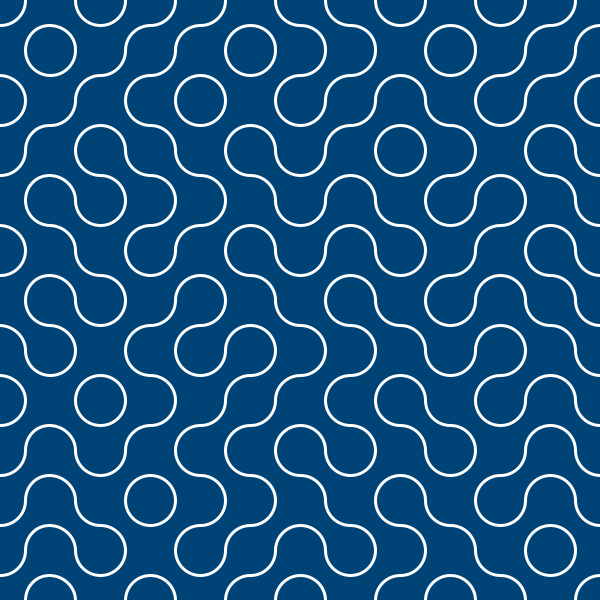

In [8]:
size(600,600)
background('#004477')
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

for column in range(12):
    for row in range(12):
        #print( int(random(2)) == 1 )
        if int(random(2)) == 1:
            arc(column * 50, row * 50, 50,50, 0,PI/2)
            arc(column * 50 + 50, row * 50+50, 50,50, PI,PI+PI/2)
        else:
            arc(column * 50 + 50, row * 50, 50,50, PI/2,PI)
            arc(column * 50, row * 50 + 50, 50,50, PI+PI/2,2*PI)

<img src="images/randomness/random-truchet-quarter-circle-done.png">

Each time this code is run, you'll get a different randomized quarter-circle Truchet pattern.

## progressively-jittery quads task

This exercise was adapted from Ira Greenberg’s *Processing: Creative Coding and Generative Art in Processing 2* (page 80), which teaches programming using Processing's Java mode, rather than Python-based implementations like py5. You'll be recreating (using randomness, not manual labor) the following reference image:

<img src="images/randomness/progressively-jittery-quads.png">

Let's place a small amount of code to start you off, and give you a few hints.

In [ ]:
size(600,600)
background('#004477')
stroke('#FFFFFF')

# This variable will come in handy. Trust me.
jitter = 0

quad(50, 50, # top-left corner
     50, 100, # lower-left
     100, 100, # lower-right corner
     100, 50) # top-right corner

You'll be drawing a total of 64 `quad()`s - in eight rows and eight columns. So, consider that a good place to start might be something like...

```
for column in range(8):
    for row in range(8):
```

Notice in the reference image that as quads are drawn across the page, there is an increasing amount of "jitter" - or randomness - nudging their corners, or vertices, up, down, left and right. Of course, since we're working with quads, we have a high amount of control over each one of their vertices, which makes them preferable to the visually similar `rect()`. 

If you wanted to make a set of quads that became linearly more distorted - instead of randomly - you could try adding a variable (like perhaps that variable above, `jitter`) to its corners, and increasing `jitter` each time your loop runs. 

Of course, because you want this to happen randomly, you'll have to get a bit more clever. `random(jitter)` will return a random number up to the value of the `jitter` variable. Even more useful, `random(-jitter, jitter)` can also return negative values - which in this case might help you make sure those vertices can be distorted upwards and to the left, too. 

First, just work on placing each quad in your for loop, using the `column` and `row` variables generated by that loop. 

Next, try adding some random jitter to each corner... and increasing that jitter over time. Good luck!